In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('GSOC.csv')

In [3]:
data = data.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

In [4]:
data.head()

,category,org_name,tech,topics
0,Science and Medicine,52°North Initiative for Geospatial Open Source...,"['javascript', 'android', 'web', ' java']","['ogc', 'web processing', 'sensorweb', 'floati..."
1,Other,AboutCode.org,"['python', ' javascript', 'nlp', 'automaton', ...","['license-scan', 'oss licensing', 'package man..."
2,Science and Medicine,AerospaceResearch.net,"['python', ' c/c++', 'vhdl', 'boinc', 'java']","['cubesats', 'space applications', 'software d..."
3,Programming Languages and Development Tools,aimacode,"['python', 'python 3', ' java', ' javascript',...","['machine learning', 'artificial intelligence'..."
4,End User Applications,Amahi,"['golang', 'ruby on rails', ' android', 'ios',...","['media server', 'storage server', 'streaming'..."


In [99]:
data['topics'][0]

"['ogc', 'web processing', 'sensorweb', 'floating car data', 'earth observation']"

In [5]:
data_count=data.groupby('category').count()

In [6]:
sns.set(font_scale=2)

Text(0.5,1,'Bar Chart')

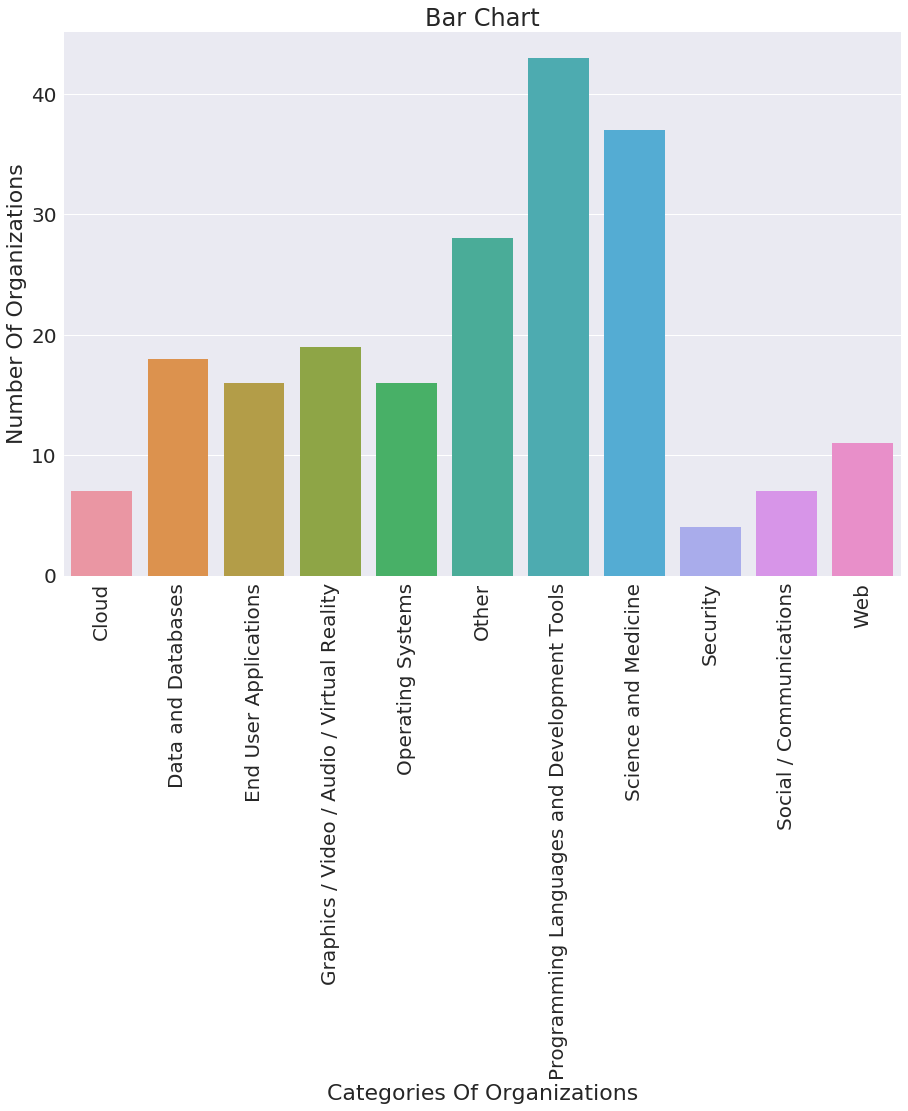

In [7]:
plt.figure(figsize=(15,10))
sns.barplot(x=data_count.index, y=data_count['org_name'])
plt.xticks(rotation= 90)
plt.xlabel('Categories Of Organizations')
plt.ylabel('Number Of Organizations')
plt.title('Bar Chart')

In [65]:
import ast
#l = ast.literal_eval(data['tech'][0])
#for i,j in enumerate(data['tech']):
#    data['tech'][i] = ast.literal_eval(data['tech'][i])
tech_stack_all = []
for i in data['tech']:
    tech_stack_all= tech_stack_all+i
tech_stack_all = [i.strip() for i in tech_stack_all]
tech_stack_unique = list(set(tech_stack_all))
tech_count = [tech_stack_all.count(i) for i in tech_stack_unique]
tech_dict = {'Tech_Stack':tech_stack_unique,'Count':tech_count}
tech_df = pd.DataFrame(tech_dict)
sorted_tech=tech_df.sort_values('Count',ascending=False)
sorted_tech.index = list(range(1,270))

In [66]:
len(tech_stack_unique)

269

In [72]:
data.loc['python'in i or 'python 3' in i for i in data['tech'],:]

SyntaxError: invalid syntax (<ipython-input-72-03dbfcd34442>, line 1)

Text(0.5,1,'Google Summer Of Code Most Trending Tech Stack')

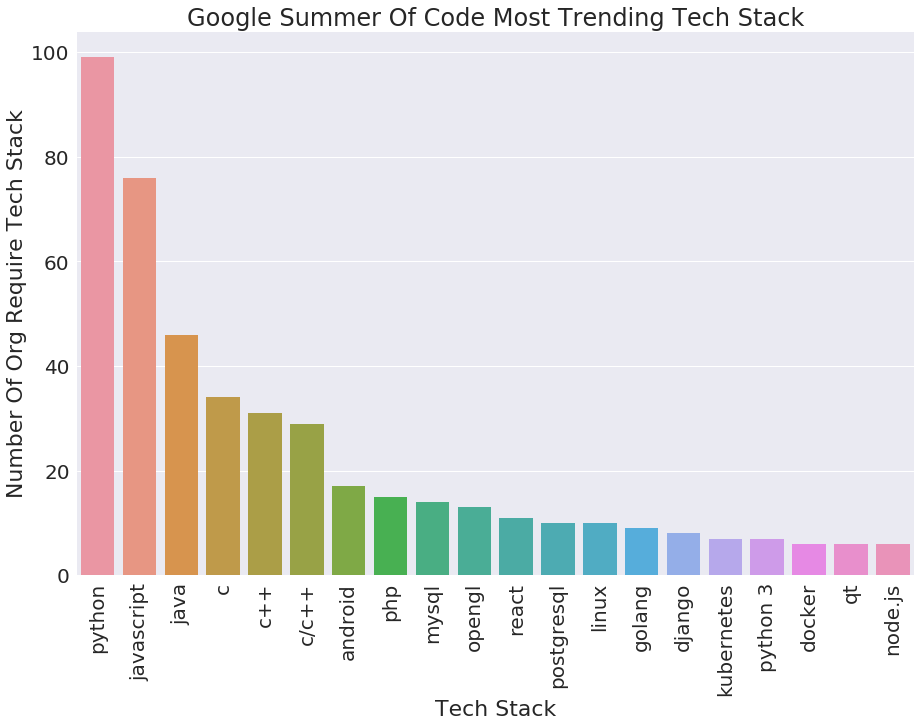

In [68]:
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_tech['Tech_Stack'][:20], y=sorted_tech['Count'][:20])
plt.xticks(rotation= 90)
plt.xlabel('Tech Stack')
plt.ylabel('Number Of Org Require Tech Stack')
plt.title('Google Summer Of Code Most Trending Tech Stack')

In [22]:
import ast
topic_stack_all = []

for i,j in enumerate(data['topics']):
    data['topics'][i] = ast.literal_eval(data['topics'][i])

for i in data['topics']:
    topic_stack_all= topic_stack_all+i

topic_stack_all = [i.strip() for i in topic_stack_all]

topic_stack_unique = list(set(topic_stack_all))

topic_count = [topic_stack_all.count(i) for i in topic_stack_unique]

topic_dict = {'Topic':topic_stack_unique,'Count':topic_count}
topic_df = pd.DataFrame(topic_dict)

sorted_topic=topic_df.sort_values('Count',ascending=False)

In [32]:
len(topic_stack_all)

864

In [33]:
len(topic_stack_unique)

483

Text(0.5,1,'Google Summer Of Code Most Trending Topics')

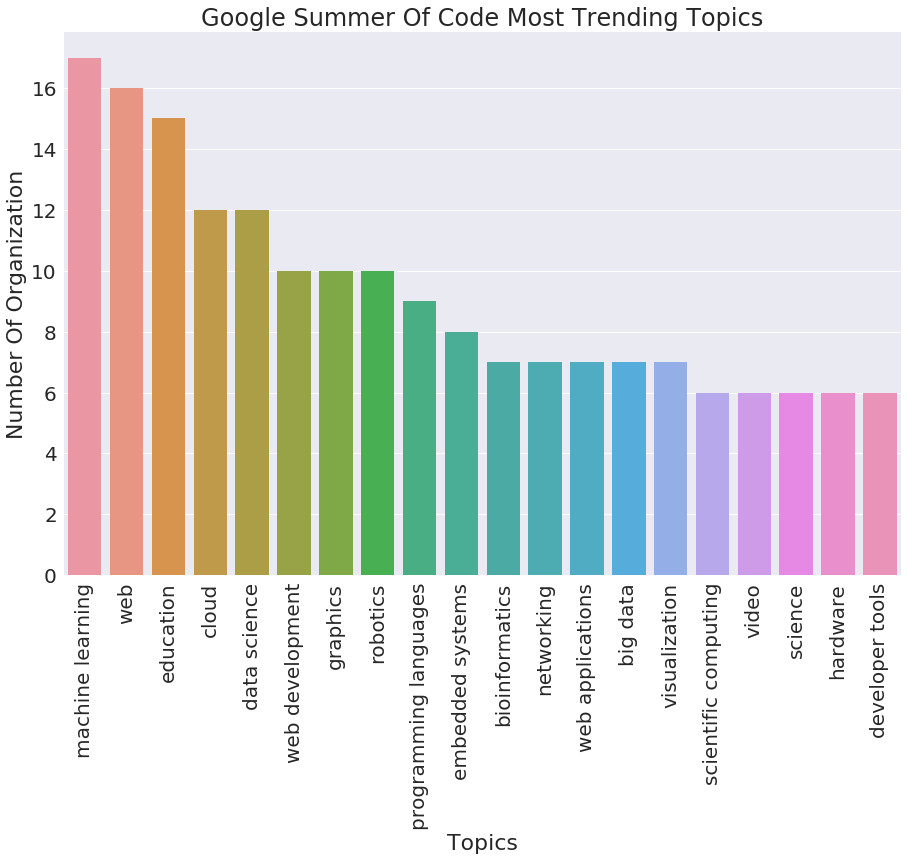

In [72]:
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_topic['Topic'][:20], y=sorted_topic['Count'][:20])
plt.xticks(rotation= 90)
plt.xlabel('Topics')
plt.ylabel('Number Of Organization')
plt.title('Google Summer Of Code Most Trending Topics')

In [110]:
data['tech']=data['tech'].apply(lambda x: ' '.join(x))

In [111]:
data['topics']=data['topics'].apply(lambda x: ' '.join(x))

In [112]:
data.head()

,category,org_name,tech,topics
0,Science and Medicine,52°North Initiative for Geospatial Open Source...,javascript android web java,ogc web processing sensorweb floating car data...
1,Other,AboutCode.org,python javascript nlp automaton search,license-scan oss licensing package managers co...
2,Science and Medicine,AerospaceResearch.net,python c/c++ vhdl boinc java,cubesats space applications software defined r...
3,Programming Languages and Development Tools,aimacode,python python 3 java javascript machine lear...,machine learning artificial intelligence educ...
4,End User Applications,Amahi,golang ruby on rails android ios containers,media server storage server streaming backups ...


In [51]:
sorted_tech.iloc[0,0] = sorted_tech.iloc[0,0]+sorted_tech.iloc[16,0]

In [53]:
sorted_tech.drop(17,axis=0,inplace=True)

In [171]:
sorted_tech.sort_values('Tech_Stack')[200:240]

,Count,Tech_Stack
25,5,rest
114,1,risc-v
153,1,robotics
41,3,ros
249,1,rpc
26,5,ruby
63,3,ruby on rails
143,1,rubyonrails
23,5,rust
31,4,scala


In [25]:
data_science = data[data['category'] == 'Science and Medicine']

In [27]:
data_science_tech=[]
for i in data_science['tech']:
    data_science_tech = data_science_tech + i

In [8]:
data_category = data.groupby('category')

In [24]:
data['tech'][0]

['javascript', 'android', 'web', ' java']

In [29]:
data_science_tech = [i.strip() for i in data_science_tech]

In [31]:
data_science_tech_unique = list(set(data_science_tech))

In [95]:
k = []
for i in data['tech']:
    print(i)
    if 'c' in i or 'c++' in i or'c++ libraries c++11 c++14 c++17 c++20' in i or 'c++11' in i or 'c++14' in i or 'c++17' in i or 'c/c++' in i:
        k.append(1)
    else:
        k.append(0)

['javascript', 'android', 'web', 'java']
['python', 'javascript', 'nlp', 'automaton', 'search']
['python', 'c/c++', 'vhdl', 'boinc', 'java']
['python', 'python 3', 'java', 'javascript', 'machine learning']
['golang', 'ruby on rails', 'android', 'ios', 'containers']
['opengl', 'vulkan', 'spir-v', 'java', 'c/c++']
['scala', 'javascript', 'isabelle proof assistant', 'android', 'ios']
['c++', 'python', 'xml', 'bash']
['fpga', 'embedded', 'vhdl', 'c', 'linux']
['openapi', 'grpc', 'protocol buffers', 'rpc', 'rest']
['c++11', 'python', 'opengl']
['drones', 'python', 'linux', 'robotics', 'c/c++']
['windows', 'c/c++', 'java', 'bazel']
['raspberry pi', 'linux kernel', 'javascript', 'python', 'hardware acceleration']
['ruby on rails', 'meteor.js', 'elasticsearch', 'python', 'java']
['python', 'java', 'matlab', 'deep learning', 'medical imaging']
['c', 'c++', 'python', 'opengl']
['c++ libraries c++11 c++14 c++17 c++20']
['c/c++', 'opengl', 'opencl', 'python', 'javascript']
['gnu make', 'kconfig', 

In [96]:
k

[0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1]

In [97]:
data['C/C++'] = k

In [45]:
for i,j in enumerate(data['tech']):
    data['tech'][i] = [k.strip() for k in data['tech'][i]]

for i,j in enumerate(data['topics']):
    data['topics'][i] = [k.strip() for k in data['topics'][i]]

In [55]:
data.head(10)

,category,org_name,tech,topics,javascript,python
0,Science and Medicine,52°North Initiative for Geospatial Open Source...,"[javascript, android, web, java]","[ogc, web processing, sensorweb, floating car ...",1,0
1,Other,AboutCode.org,"[python, javascript, nlp, automaton, search]","[license-scan, oss licensing, package managers...",1,1
2,Science and Medicine,AerospaceResearch.net,"[python, c/c++, vhdl, boinc, java]","[cubesats, space applications, software define...",0,1
3,Programming Languages and Development Tools,aimacode,"[python, python 3, java, javascript, machine l...","[machine learning, artificial intelligence, ed...",1,1
4,End User Applications,Amahi,"[golang, ruby on rails, android, ios, containers]","[media server, storage server, streaming, back...",0,0
5,Programming Languages and Development Tools,Android Graphics Tools Team,"[opengl, vulkan, spir-v, java, c/c++]","[2d/3d graphics, developer tools, debugging, t...",0,0
6,End User Applications,AOSSIE - Australian Open Source Software Innov...,"[scala, javascript, isabelle proof assistant, ...","[electronic voting, natural language processin...",1,0
7,Other,Apertium,"[c++, python, xml, bash]","[machine translation, natural language process...",0,1
8,Graphics / Video / Audio / Virtual Reality,apertus° Association,"[fpga, embedded, vhdl, c, linux]","[image processing, camera, vision, fpga, embed...",0,0
9,Programming Languages and Development Tools,API Client Tools at Google,"[openapi, grpc, protocol buffers, rpc, rest]","[apis, automation, code generation, api descri...",0,0


In [98]:
data_cat=data.groupby(['category'])

In [99]:
data_category['python'].sum()

category
Cloud                                           3
Data and Databases                              6
End User Applications                           7
Graphics / Video / Audio / Virtual Reality     10
Operating Systems                               6
Other                                          21
Programming Languages and Development Tools    11
Science and Medicine                           27
Security                                        4
Social / Communications                         5
Web                                             5
Name: python, dtype: int64

In [101]:
data_category['javascript'].sum()

category
Cloud                                           1
Data and Databases                             11
End User Applications                           4
Graphics / Video / Audio / Virtual Reality      4
Operating Systems                               3
Other                                          10
Programming Languages and Development Tools    13
Science and Medicine                           15
Security                                        1
Social / Communications                         5
Web                                             9
Name: javascript, dtype: int64

In [108]:
df=data_category[['java','python','javascript','C/C++']].sum()

In [102]:
data_category['C/C++'].sum()

category
Cloud                                           3
Data and Databases                              6
End User Applications                           6
Graphics / Video / Audio / Virtual Reality     16
Operating Systems                              13
Other                                          18
Programming Languages and Development Tools    13
Science and Medicine                           14
Security                                        2
Social / Communications                         1
Web                                             1
Name: C/C++, dtype: int64

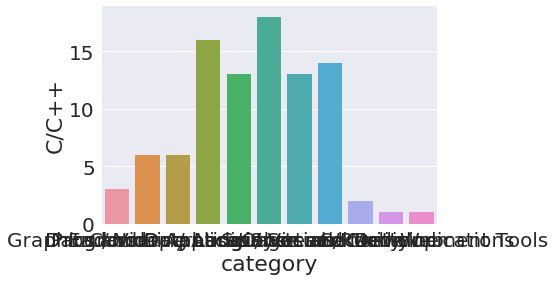

In [105]:
sns.barplot(x=data_category['C/C++'].sum().index,y=data_category['C/C++'].sum())

Text(0.5,1,'Google Summer Of Code C/C++')

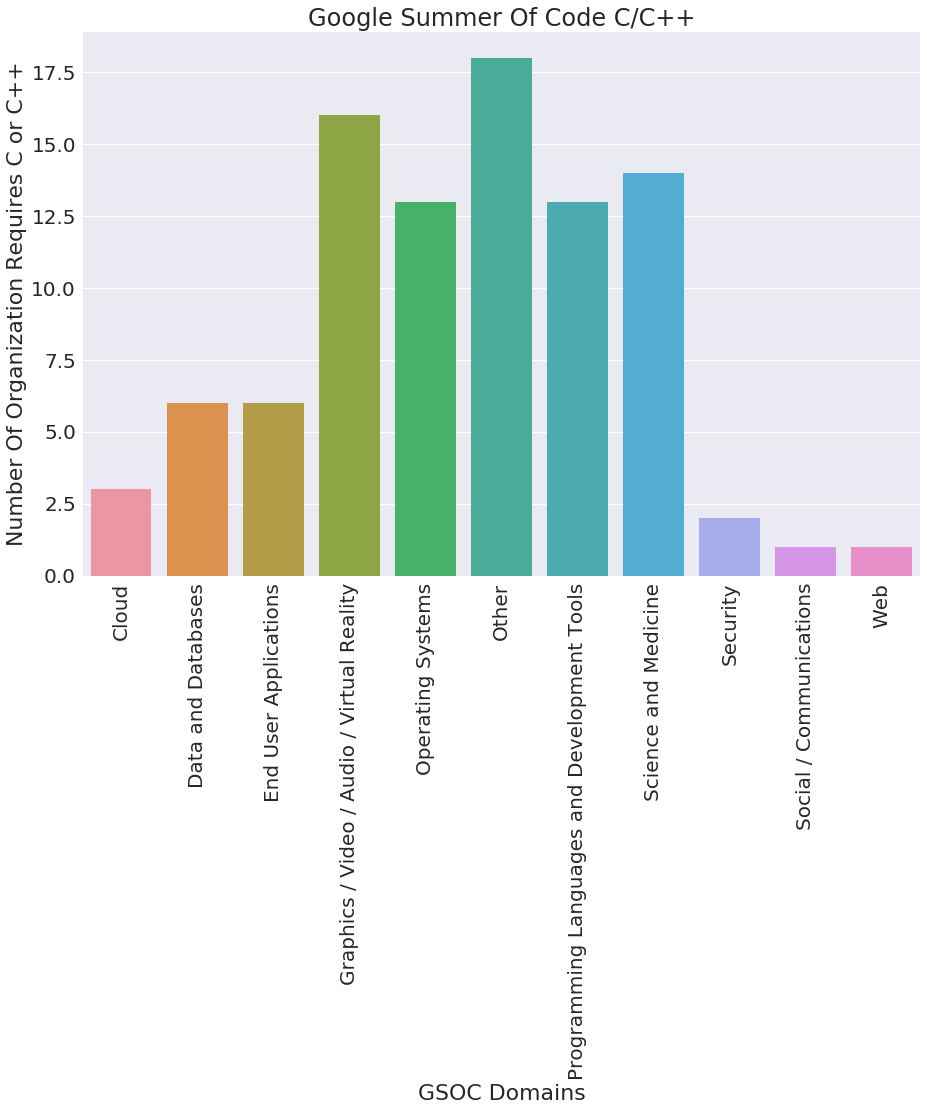

In [106]:
plt.figure(figsize=(15,10))
sns.barplot(x=data_category['C/C++'].sum().index,y=data_category['C/C++'].sum())
plt.xticks(rotation= 90)
plt.xlabel('GSOC Domains')
plt.ylabel('Number Of Organization Requires C or C++')
plt.title('Google Summer Of Code C/C++')

[Text(0,0.5,'Number Of Organizations'),
 Text(0.5,0,'GSOC Domains'),
 Text(0.5,1,'GSOC Top Tech Stack Requirement According To Domains')]

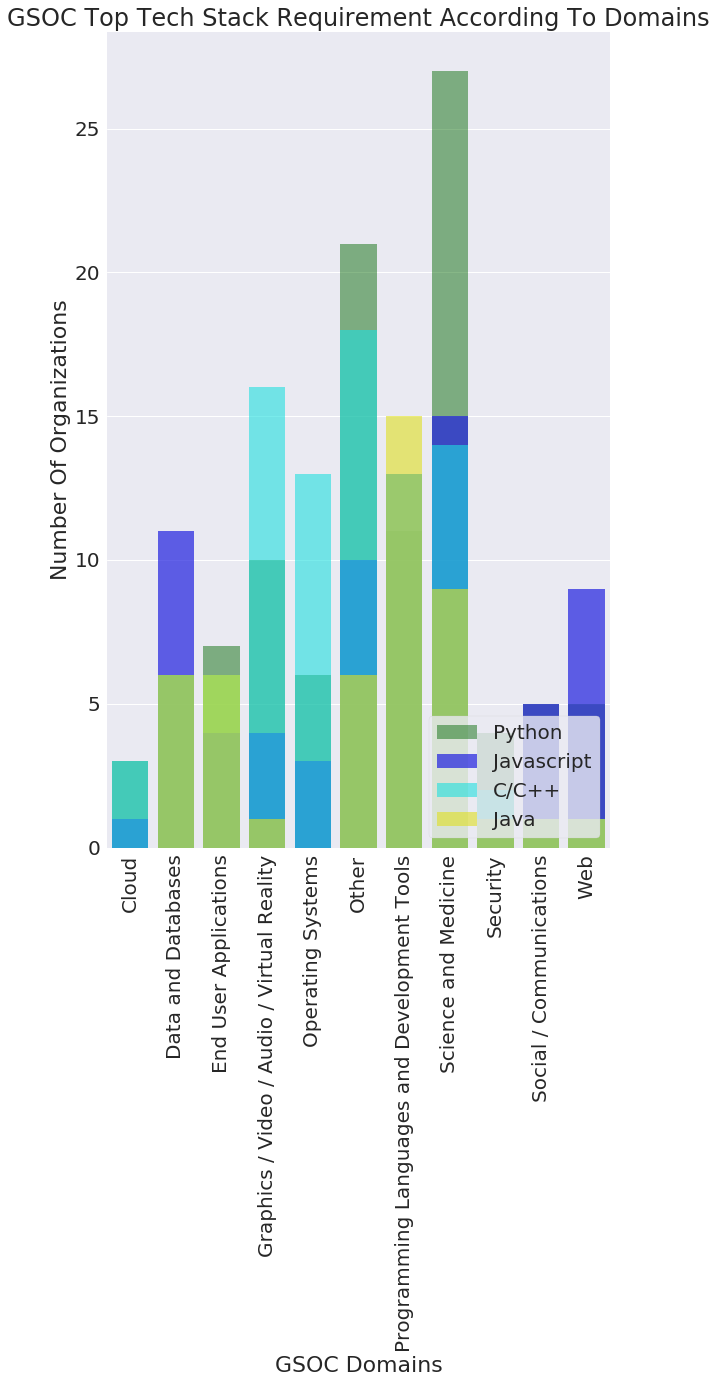

In [113]:
f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=df.index,y=df['python'],color='green',alpha = 0.5,label='Python' )
sns.barplot(x=df.index,y=df['javascript'],color='blue',alpha = 0.7,label='Javascript')
sns.barplot(x=df.index,y=df['C/C++'],color='cyan',alpha = 0.6,label='C/C++')
sns.barplot(x=df.index,y=df['java'],color='yellow',alpha = 0.6,label='Java')
plt.xticks(rotation=90)
ax.legend(loc='lower right',frameon = True)     # legendlarin gorunurlugu
ax.set(xlabel='GSOC Domains', ylabel='Number Of Organizations',title = "GSOC Top Tech Stack Requirement According To Domains")

Text(0.5,1,'Google Summer Of Code For Python')

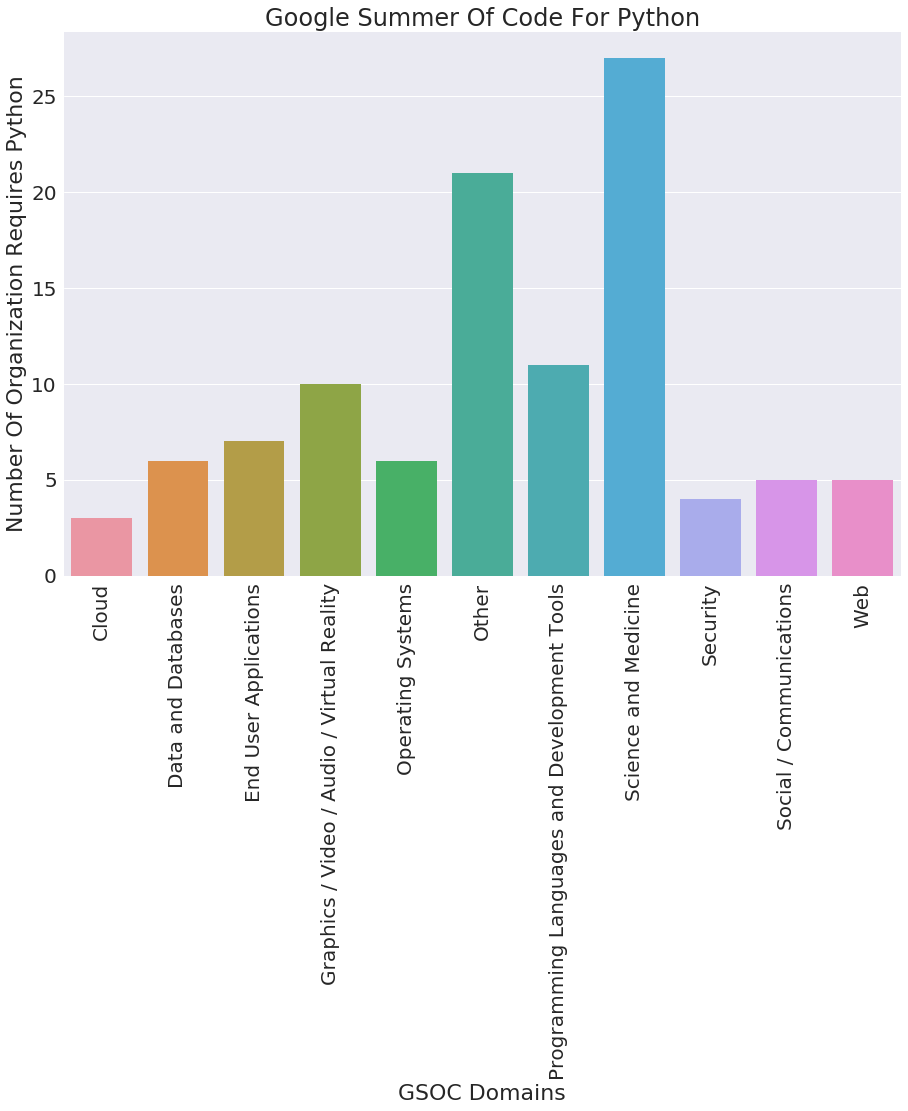

In [116]:
plt.figure(figsize=(15,10))
sns.barplot(x=data_category['python'].sum().index,y=data_category['python'].sum())
plt.xticks(rotation= 90)
plt.xlabel('GSOC Domains')
plt.ylabel('Number Of Organization Requires Python')
plt.title('Google Summer Of Code For Python')

In [154]:
data_sam = data[data['category'] == 'Programming Languages and Development Tools']

In [155]:
data_sem_tech = []
data_sem_topic = []
for i,j in zip(data_sam['tech'],data_sam['topics']):
    data_sem_tech+=i
    data_sem_topic+=j

In [161]:
len(data_sem_tech)

160

In [162]:
dstl = list(set(data_sem_tech))

In [163]:
len(dstl)

98

In [164]:
dct = {i:data_sem_tech.count(i) for i in dstl}

In [165]:
dct

{'android': 4,
 'angularjs': 1,
 'arduino': 1,
 'bazel': 1,
 'bsd': 1,
 'bytecode': 1,
 'c': 6,
 'c++': 4,
 'c++ libraries c++11 c++14 c++17 c++20': 1,
 'c/c++': 4,
 'cabal': 1,
 'chapel': 1,
 'clang': 1,
 'codeworld': 1,
 'compilers': 1,
 'céu': 1,
 'distributed systems': 1,
 'django': 1,
 'dlang': 1,
 'docker': 2,
 'documentation': 1,
 'fortran': 1,
 'fpga': 1,
 'gazebo': 1,
 'ghc': 1,
 'git': 1,
 'gnu autotools': 1,
 'gnu make': 1,
 'golang': 3,
 'google app engine': 1,
 'grafana': 2,
 'graphite': 1,
 'groovy': 1,
 'grpc': 1,
 'gtk': 1,
 'gwt': 1,
 'haskell': 2,
 'hg': 1,
 'high performance computing': 1,
 'html5': 1,
 'ide': 1,
 'influxdb': 1,
 'ios': 1,
 'jakarta': 1,
 'java': 15,
 'javascript': 13,
 'jinja2': 1,
 'jsonnet': 1,
 'jvm': 1,
 'kconfig': 1,
 'kubernetes': 2,
 'linux': 1,
 'llvm': 1,
 'lua': 3,
 'machine learning': 1,
 'node.js': 1,
 'openapi': 1,
 'opengl': 2,
 'openj9': 1,
 'os': 1,
 'osx': 1,
 'perl': 1,
 'perl5': 1,
 'perl6': 1,
 'pharo': 1,
 'programming languages

In [ ]:
sns